In [102]:
#Session 5 
#find a way to predict the GDP of a country
#1) scale the column to have the same unit + tri dans les colonnes pour garder seulement celles qui sont utiles
#2) separate the data frame i 2 parts: training(75%), testing(25%)
#3) according to the training we will see if we can predict the GDP in the part testing

In [103]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier

In [104]:
df = pd.read_pickle('C:\\Users\\Alex\\Documents\\UTC\\UTSEUS\\US01\\data_session5.pkl') #pickle is used to read a DataFrame that has been saved before

In [105]:
df.head()

,Country (according to CN Gov):,Date of research inquiry,HF Index of Economic Freedom (Scale: 1-100),Heritage Foundation Index of Economic Freedom (Global Ranking),Bertelsmann Transformation index (BTI),Bertelsmann Transformation index (BTI) - Ranking,IMF WB Customs and other import duties (% of tax revenue) 2016,WB IMF Non-performing loans to total gross loans ratio (%),Moody's Socvereign Ratings List,S&P Sovereign Ratings List,...,BRI Percentage of Urban Population in Total Population,WB Cost of Starting a Business,WB Ease of Doing Business Index (1 = most business-friendly regulations),WB Logistics Performance Index (LPI) (range: 1-5),IFDI Net Inflows (% of GDP),ED National Electric Power Consumption TwH,"WHO Current Health Expenditure p.c., PPP USD",WB Research Expenditure % of GDP,WIPO Trademark applications,WIPO Patent Applications
1,Afghanistan,NaT,51.5,152.0,2.954762,121.0,35.203141,12.201830,NaN,NaN,...,26.703,0.0,NaN,NaN,0.718898,NaN,162.781158,NaN,NaN,NaN
2,Albania,NaT,66.5,52.0,6.828571,30.0,2.216459,13.232533,8,7,...,57.407,0.0,NaN,NaN,8.015508,NaN,759.666984,NaN,1232.0,14.0
3,Armenia,NaT,67.7,47.0,5.576190,61.0,6.275395,5.432318,9,NaN,...,62.673,0.0,NaN,NaN,2.044111,NaN,876.856857,NaN,2685.0,107.0
4,Azerbaijan,NaT,65.4,60.0,4.127381,100.0,7.571847,NaN,12,12,...,54.62,0.0,NaN,NaN,2.988948,NaN,1193.058830,NaN,2817.0,144.0
5,Bahrain,NaT,66.4,54.0,4.616667,89.0,27.386091,NaN,NaN,12,...,88.775,2.9,NaN,NaN,4.014072,NaN,1866.297320,NaN,253.0,8.0


In [106]:
df.columns

Index(['Country (according to CN Gov):', 'Date of research inquiry',
       'HF Index of Economic Freedom (Scale: 1-100)',
       'Heritage Foundation Index of Economic Freedom (Global Ranking)',
       'Bertelsmann Transformation index (BTI)',
       'Bertelsmann Transformation index (BTI) - Ranking',
       'IMF WB\nCustoms and other import duties (% of tax revenue) 2016',
       'WB IMF Non-performing loans to total gross loans ratio (%)',
       'Moody's Socvereign Ratings List', 'S&P Sovereign Ratings List',
       'Fitch Sovereign Ratings List',
       'UIC Rail freight (mn ton x km travelled)',
       'ICAO air freight (mn ton x km travelled)',
       'WB Household final consumption expenditure, PPP bn USD',
       'WB UNESCO R&D Expenditure % of GDP',
       'WB UNESCO Researchers p. mn inhabitants',
       'TI Corruption Perception Index',
       'TI Corruption Perception Index - Ranking', 'BRI GDP', 'BRI GDP p.c.',
       'BRI GDP growth rate', 'BRI Y.o.Y. GDP growth rate p.c

In [107]:
#selection of the colum of interest
#we remove the data with a lot of Nan
#the more data we have the better the prediction will be
df_modeling = df[['Country (according to CN Gov):',
       'HF Index of Economic Freedom (Scale: 1-100)',
       'Bertelsmann Transformation index (BTI)',
       'WB UNESCO R&D Expenditure % of GDP',
       'WB UNESCO Researchers p. mn inhabitants',
       'TI Corruption Perception Index',
        'BRI GDP p.c.']]

In [108]:
df_modeling = df_modeling.dropna() #drop the column where there is no data

In [109]:
df_modeling.head()

,Country (according to CN Gov):,HF Index of Economic Freedom (Scale: 1-100),Bertelsmann Transformation index (BTI),WB UNESCO R&D Expenditure % of GDP,WB UNESCO Researchers p. mn inhabitants,TI Corruption Perception Index,BRI GDP p.c.
2,Albania,66.5,6.828571,0.15412,156.10110,36.0,3965.01680558488
5,Bahrain,66.4,4.616667,0.10116,368.90235,36.0,23395.7476902684
9,Bosnia and Herzegovina,61.9,6.282143,0.19951,463.89852,38.0,4197.80730449044
11,Bulgaria,69.0,7.800000,0.77079,2130.54538,42.0,6819.86910816324
12,Cambodia,58.7,4.000000,0.11823,30.37447,21.0,1158.69


In [110]:
#matplotlib/seaborn library pour plot
#on va prédire le GDP avec des niveaux (low, high...) car il est compliqué de prédire un chiffre exact
df_modeling['BRI GDP p.c.']

2     3965.01680558488
5     23395.7476902684
9     4197.80730449044
11    6819.86910816324
12             1158.69
14    11535.8293558997
15    17231.2817109642
17    3614.74676616271
18      17295.36383043
20    3795.97330845042
22    12259.1150279573
23    1581.58891324619
24    3346.48703949478
28    4940.04583805643
29    10508.3964031895
30    28984.6433890283
32    1812.32676524824
33    13664.9414278021
35    14172.2210702975
36    4852.65784744443
37             9766.17
39    1843.24280182141
41    6415.03408351413
42    1203.50538655951
43    732.298716316243
44    15645.0807292348
45    1428.98863660717
46    2899.37527818265
47    12494.4661900747
48    74667.1970705737
49    8972.92251840971
50    9057.11306037766
52    5143.94992561858
53    52888.7446717529
54    15962.5722388828
55    20713.0747463331
56    3926.17439589454
59    5816.44068998475
60    40438.3763627115
61    9130.02606479616
65    2114.95471628444
66    2132.07244181734
67    2111.13802366815
Name: BRI G

In [111]:
#the numbers in the columnare considered as objects not numbers
df_modeling['BRI GDP p.c.'] = df_modeling['BRI GDP p.c.'].apply(lambda x: float(x))
#df_modeling['BRI GDP p.c.'] = df_modeling['BRI GDP p.c.'].apply(float)

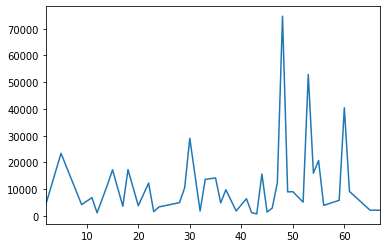

In [112]:
%matplotlib inline
df_modeling['BRI GDP p.c.'].plot()

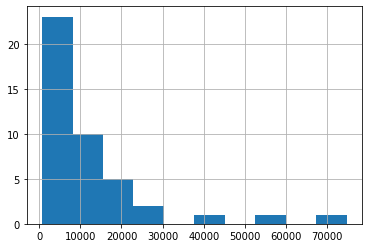

In [113]:
df_modeling['BRI GDP p.c.'].hist()

In [114]:
df_modeling['BRI GDP p.c.'].describe() #basic stat of the column

count       43.000000
mean     11503.154977
std      14498.323548
min        732.298716
25%       3122.931159
50%       6415.034084
75%      13918.581249
max      74667.197071
Name: BRI GDP p.c., dtype: float64

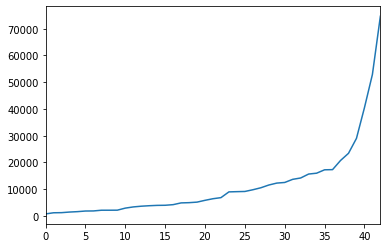

In [115]:
df_modeling['BRI GDP p.c.'].sort_values().plot(use_index=False)

In [116]:
#3 intervalles
#[0-5000] low gdp
#[5000-20000] average gdp
#[20000-...] high gdp
df_modeling['GDP'] = pd.cut(df_modeling['BRI GDP p.c.'],
                            bins=[0,5000,20000,max(df_modeling['BRI GDP p.c.'])],
                            labels=['low','average','high'])
df_modeling.head()

,Country (according to CN Gov):,HF Index of Economic Freedom (Scale: 1-100),Bertelsmann Transformation index (BTI),WB UNESCO R&D Expenditure % of GDP,WB UNESCO Researchers p. mn inhabitants,TI Corruption Perception Index,BRI GDP p.c.,GDP
2,Albania,66.5,6.828571,0.15412,156.10110,36.0,3965.016806,low
5,Bahrain,66.4,4.616667,0.10116,368.90235,36.0,23395.747690,high
9,Bosnia and Herzegovina,61.9,6.282143,0.19951,463.89852,38.0,4197.807304,low
11,Bulgaria,69.0,7.800000,0.77079,2130.54538,42.0,6819.869108,average
12,Cambodia,58.7,4.000000,0.11823,30.37447,21.0,1158.689904,low


In [117]:
#sklearn library for models 
#pour le modele on utilise généralement des données qui sont centrées en 0: rescale (sur internet sklearn scaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_modeling['HF_scaled'] = scaler.fit_transform(df_modeling[['HF Index of Economic Freedom (Scale: 1-100)']]) 
df_modeling['HF_scaled']
#il faut utiliser double crochet car cette fonction nest utilisable que si appliquée à plusieurs colonnes

2     0.263836
5     0.251314
9    -0.312177
11    0.576887
12   -0.712882
14   -0.374787
15    1.165422
17   -1.489247
18    1.528561
20    1.440906
22    0.076006
23   -1.151153
24    0.176182
28    0.263836
29    0.126094
30   -0.449919
32   -0.875668
33    0.752195
35    1.228032
36    0.839849
37    1.265598
39   -0.662794
41   -0.487485
42   -1.351505
43   -1.326461
44   -0.424875
45   -1.176197
46   -0.074259
47    0.426622
48    1.027680
49    0.526799
50   -0.687838
52   -0.061736
53    3.131380
54    0.076006
55    0.138616
56   -1.000888
59   -0.299655
60    1.653781
61    0.025918
65   -1.514291
66   -1.389071
67   -1.138631
Name: HF_scaled, dtype: float64

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_modeling['HF_scaled'] = scaler.fit_transform(df_modeling[['HF Index of Economic Freedom (Scale: 1-100)']])
df_modeling['BTI_scaled'] = scaler.fit_transform(df_modeling[['Bertelsmann Transformation index (BTI)']])
df_modeling['WB_GDP_scaled'] = scaler.fit_transform(df_modeling[['WB UNESCO R&D Expenditure % of GDP']]) 
df_modeling['WB_inhab_scaled'] = scaler.fit_transform(df_modeling[['WB UNESCO Researchers p. mn inhabitants']]) 
df_modeling['TI_scaled'] = scaler.fit_transform(df_modeling[['BRI GDP p.c.']]) 

df_export = df_modeling[['HF_scaled','BTI_scaled','WB_GDP_scaled','WB_inhab_scaled','TI_scaled','GDP']]
df_export.to_csv('gdp_modeling.csv')
df_export


,HF_scaled,BTI_scaled,WB_GDP_scaled,WB_inhab_scaled,TI_scaled,GDP
2,0.263836,0.288056,-0.905864,-0.869097,-0.526085,low
5,0.251314,-1.011212,-1.006223,-0.719452,0.829981,high
9,-0.312177,-0.032915,-0.819850,-0.652649,-0.509839,low
11,0.576887,0.858671,0.262729,0.519359,-0.326845,average
12,-0.712882,-1.373441,-0.973876,-0.957509,-0.721938,low
14,-0.374787,1.016010,0.450846,0.332936,0.002280,average
15,1.165422,1.869835,2.198590,1.615929,0.399765,average
17,-1.489247,-1.209809,-0.049644,-0.508144,-0.550530,low
18,1.528561,1.867737,1.309169,1.530858,0.404237,average
20,1.440906,0.046803,-0.649223,-0.036768,-0.537882,low


In [119]:
#---------

In [120]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [121]:
df_export['is_train'] = np.random.uniform(0, 1, len(df_export)) <= .75
df_export['is_train']

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


2      True
5      True
9      True
11     True
12     True
14     True
15     True
17    False
18     True
20     True
22     True
23     True
24     True
28    False
29    False
30     True
32     True
33     True
35    False
36    False
37    False
39     True
41     True
42    False
43    False
44     True
45     True
46     True
47     True
48     True
49    False
50    False
52     True
53    False
54     True
55    False
56     True
59     True
60     True
61    False
65     True
66     True
67     True
Name: is_train, dtype: bool

In [122]:
train, test = df_export[df_export['is_train']==True], df_export[df_export['is_train']==False]
train

,HF_scaled,BTI_scaled,WB_GDP_scaled,WB_inhab_scaled,TI_scaled,GDP,is_train
2,0.263836,0.288056,-0.905864,-0.869097,-0.526085,low,True
5,0.251314,-1.011212,-1.006223,-0.719452,0.829981,high,True
9,-0.312177,-0.032915,-0.819850,-0.652649,-0.509839,low,True
11,0.576887,0.858671,0.262729,0.519359,-0.326845,average,True
12,-0.712882,-1.373441,-0.973876,-0.957509,-0.721938,low,True
14,-0.374787,1.016010,0.450846,0.332936,0.002280,average,True
15,1.165422,1.869835,2.198590,1.615929,0.399765,average,True
18,1.528561,1.867737,1.309169,1.530858,0.404237,average,True
20,1.440906,0.046803,-0.649223,-0.036768,-0.537882,low,True
22,0.076006,0.642593,1.369184,1.077338,0.052758,average,True


In [123]:
features = df_export.columns[0:5]
features

Index(['HF_scaled', 'BTI_scaled', 'WB_GDP_scaled', 'WB_inhab_scaled',
       'TI_scaled'],
      dtype='object')

In [124]:
y_train = np.array(train['GDP'])
y_train

array(['low', 'high', 'low', 'average', 'low', 'average', 'average',
       'average', 'low', 'average', 'low', 'low', 'high', 'low',
       'average', 'low', 'average', 'average', 'low', 'low', 'average',
       'high', 'average', 'average', 'low', 'average', 'high', 'low',
       'low', 'low'], dtype=object)

In [125]:
from sklearn.metrics import classification_report

rfc = RandomForestClassifier()

rfc.fit(train[features], y_train)

y_predict = rfc.predict(test[features])
y_true = test['GDP']

print(classification_report(y_true,y_predict))

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

     average       0.67      1.00      0.80         6
        high       0.00      0.00      0.00         2
         low       1.00      0.80      0.89         5

    accuracy                           0.77        13
   macro avg       0.56      0.60      0.56        13
weighted avg       0.69      0.77      0.71        13



C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
